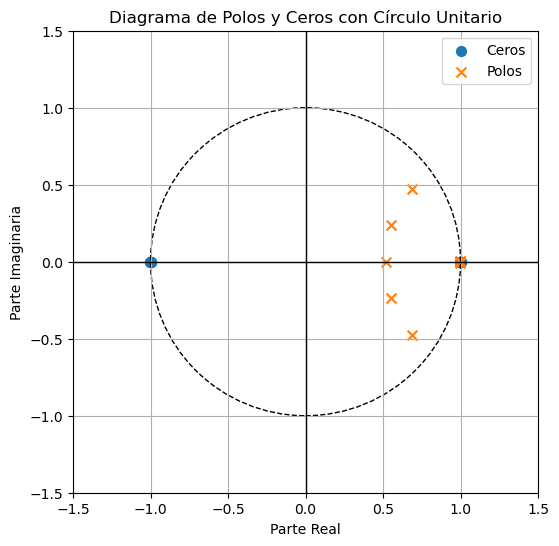

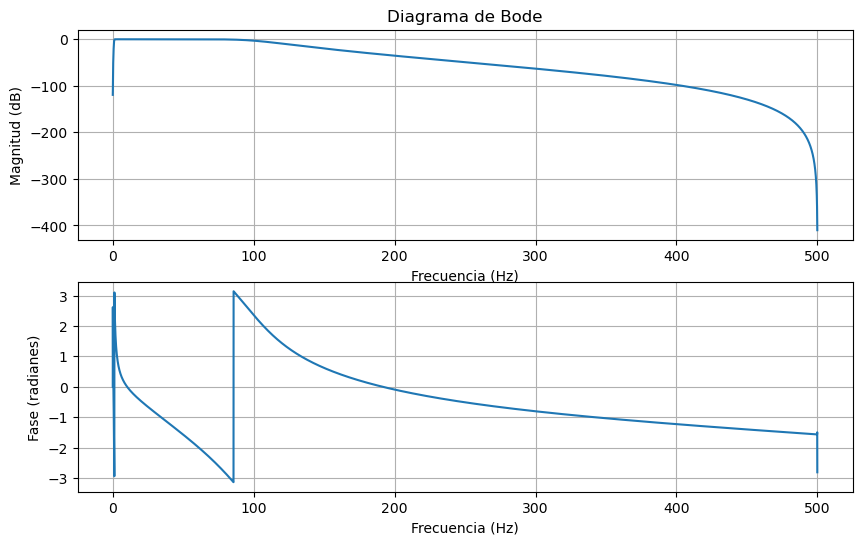

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

# Función para graficar el diagrama de polos y ceros
def plot_pole_zero(b, a):
    # Calcular los polos y ceros
    zeros, poles, _ = sig.tf2zpk(b, a)
    
    # Graficar los polos y ceros
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(zeros), np.imag(zeros), s=50, marker='o', label='Ceros')
    plt.scatter(np.real(poles), np.imag(poles), s=50, marker='x', label='Polos')
    
    # Graficar el círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dashed')
    plt.gca().add_artist(unit_circle)
    
    # Configurar la gráfica
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.title('Diagrama de Polos y Ceros con Círculo Unitario')
    plt.grid(True)
    plt.legend()
    plt.savefig("Zplane_Pasa.png", format='png')
    plt.show()

# Función para graficar el diagrama de Bode
def plot_bode(b, a, fs):
    # Obtener la respuesta en frecuencia
    w, h = sig.freqz(b, a, worN=8000)
    
    # Convertir la frecuencia a Hz
    freqs = w * fs / (2 * np.pi)
    
    # Graficar la magnitud en decibelios
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(freqs, 20 * np.log10(abs(h)))
    plt.title('Diagrama de Bode')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.grid(True)
    
    # Graficar la fase
    plt.subplot(2, 1, 2)
    plt.plot(freqs, np.angle(h))
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Fase (radianes)')
    plt.grid(True)
    plt.savefig("Bode_Pasa.png", format='png')
    plt.show()

# Frecuencia de muestreo
fs = 1000  # Frecuencia de muestreo en Hz


# Diseño del filtro IIR Butterworth pasa-banda
order = 5  # Orden del filtro
lowcut = 1  # Frecuencia de corte inferior (en Hz)
highcut = 100  # Frecuencia de corte superior (en Hz)

# Calcular los coeficientes del filtro IIR Butterworth pasa-banda
b, a = sig.butter(order, [lowcut / (fs / 2), highcut / (fs / 2)], btype='bandpass')



# Graficar el diagrama de polos y ceros
plot_pole_zero(b, a)

# Graficar el diagrama de Bode
plot_bode(b, a, fs)


In [ ]:
import zplane as zp
import scipy.signal as sig

# Create trasnfer function for a lowpass filter
b, a = sig.butter(3, 0.1, btype='low', output='ba')
tf = sig.TransferFunction(b, a, dt=1/44100)

# Normalised frequency response with grid
zp.freq(tf, type='solid', grid=True, name='3rd order Lowpass filter')

# Pole-Zero plot
zp.pz(tf)

# Non logartihmic Bode plot cut short of Nyquist Frequency
zp.bode(tf, log=True)


# Impulse response
zp.impulse(tf, name='Lowpass filter')

# Normalising system (In this case norm does nothing as sig.butter normalises the generated filter)
zp.norm(tf)

ModuleNotFoundError: No module named 'zplane'